# Single Compartment Model

## Overview

This notebook aims to show how the response of a point neuron with passive membrane to an input current can be modelled in Python.



We are interested in employing the equivalent circuit model of the neuron.

In particular, we want to find the response of the membrane potential over time, denoted as $V(\cdot)$, to some input current $I_e(\cdot)$. We will implement the circuit model, and then approximate $V(\cdot)$ numerically.
First, we need to initialize the model's parameters. We set them as
- membrane equilibrium potential: $E_m = 0V$
- length: $L = 100\mu m$
- diameter: $d = 2\mu m$
- specific membrane resistance: $r_m = 1\Omega m^2$
- specific membrance capacitance: $c_m = 10^{-2} F m^{-2}$

**Step 1**: Implement the model parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

delta_t, t_start, t_stop = 1e-4, -0.2, 0.2  #  time step, start and stop time needed for the simulation
Em, L, d, rm, cm = 0, 100, 2, 1, 10 ** (-2)  # parameters of the model

We have the model parameters given as _specific_ values which are normalized spatially, whereas the input current is not given as a density. Thus, we need to convert our specific parameters to non-specific ones.

**Step 2**: Create a function convert_parameters() to convert the specific parameters

In [19]:
def convert_parameters(Em, L, d, rm, cm):     
    '''Returns non-speficic paramaters for a given set of specific parameters.
    
    Args:
        Em: Equilibrium potential
        L: Length of the compartment
        d: Diameter of the compartment
        rm: Specific membrane resistance
        cm: Specific membrane capacitance
         
    Returns:
        Em: Equilibrium potential
        L: Length of the compartment
        d: Diameter of the compartment
        Rm: Membrane resistance
        Mm: Membrane capacitance         
    '''
    
    Rm = rm / (np.pi * d * L * 10 ** (-12))
    Cm = cm * (np.pi * d * L * 10 ** (-12))
    return (Em, L, d, Rm, Cm)

In [20]:
# Call the function to convert the initial parameters

Em, L, d, Rm, Cm = convert_parameters(Em, L, d, rm, cm)

Having initialized the model parameters, we next need to implement the current input to the circuit. First, we will simulate a step input of the form
$$
I_e(t) = 
\begin{cases}
0, & t < 0 \\
-50pA, & 0 \leq t
\end{cases}.
$$

**Step 3**: We implement the step-function input.

In [21]:
def step_input(time):    
    '''Implements the time-dependent input current I_e.
    
    Args:
        Time as float
         
    Returns:
        Input current at the given time as float     
    '''
    
    if time < 0:
        I = 0
    else:
        I = 50 * 10 ** (-12)
    return (float(I))

"""
# DECAY VARIATION

    if 0 < time< 0.1:
        I = 50 * 10 ** (-12)
    else:
        I=0
    return (float(I))
"""

'\n#DECAY VARIATION\n\n    if 0 < time< 0.1:\n        I = 50 * 10 ** (-12)\n    else:\n        I=0\n    return (float(I))\n'

Now, we can put everything together to simulate the neuron. The DEQ governing the membrane potential is as follows:

$$
C_m \frac{\text{d}V}{\text{d}t} = \frac{E_m - V(t)}{R_m} + I_e(t).
$$
To solve this equation, we can use Euler's backward method to approximate $\frac{\text{d}V}{\text{d}t}$ by
$$
\frac{V(t) - V(t - \Delta t)}{\Delta t}.
$$

**Step 4**: We implment a function to to simulate the membrane response to the step input by approximating $V(\cdot )$.

In [22]:
def simulate_step_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm):     
    '''Solves the single-compartment equation using Euler approximation.
    
    Args:
        delta_t: Time step size for Euler
        t_start: Start time of the simulation
        t_stop: End time of the simulation
        Em, L, d, Rm, Cm: As before. Output of convert_parameters() function
         
         
    Returns:
        t: Grid points on which the solution is evaluated
        v: The approximated membrane potential evaluated at the grid points            
    '''
    
# Backward Euler's method to solve the equation:

    X = []
    X.append([t_start, Em])
    for p in np.linspace(t_start, t_stop, int((t_stop - t_start) / delta_t)):
        t_current, v_current = X[-1]
        I = step_input(t_current)
        v_new = (v_current + delta_t * I / Cm) / (1 + delta_t / (Rm * Cm))
        X.append([t_current + delta_t, v_new])
    X = np.array(X)
    t = X[:, 0]
    v = X[:, 1]
    return t, v


# Forward Euler's method to solve the equation:

"""

    X = []
    X.append([t_start, Em])
    for p in np.linspace(t_start, t_stop, int((t_stop - t_start) / delta_t)):
        dvdt = (Em - X[-1][1]) / (Rm * Cm) + step_input(X[-1][0]) / Cm
        X.append([X[-1][0] + delta_t, X[-1][1] + dvdt * delta_t])
    X = np.array(X)
    t = (X[:, 0])
    v = X[:, 1]

    return (t, v)
"""    

'\n\n    X = []\n    X.append([t_start, Em])\n    for p in np.linspace(t_start, t_stop, int((t_stop - t_start) / delta_t)):\n        dvdt = (Em - X[-1][1]) / (Rm * Cm) + step_input(X[-1][0]) / Cm\n        X.append([X[-1][0] + delta_t, X[-1][1] + dvdt * delta_t])\n    X = np.array(X)\n    t = (X[:, 0])\n    v = X[:, 1]\n\n    return (t, v)\n'

**Step 5:** Testing the function for different values of $\Delta t$.

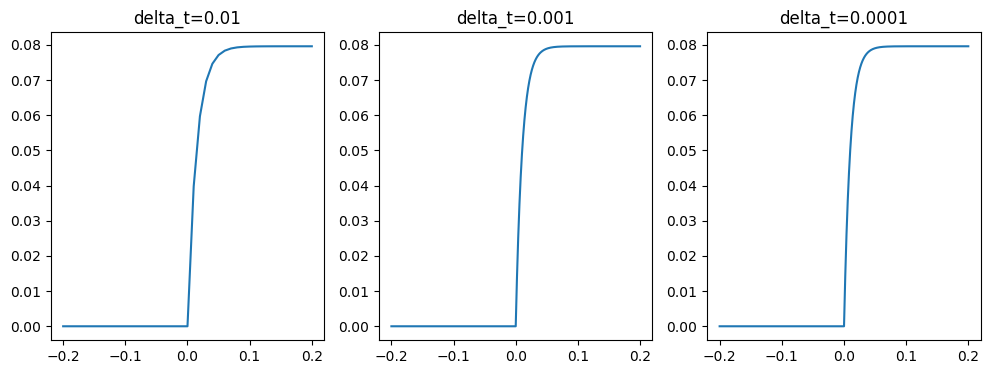

In [23]:
delta_t=(0.01,0.001,0.0001)
subplot_titles = ["delta_t=0.01","delta_t=0.001","delta_t=0.0001"]
num_subplots=len(delta_t)
fig, axes = plt.subplots(1, num_subplots, figsize=(12, 4))
for i in range(len(delta_t)):
    t, v = simulate_step_function(delta_t[i], t_start, t_stop, Em, L, d, Rm, Cm)
    axes[i].plot(t, v)
    axes[i].set_title(subplot_titles[i])
plt.show()

We can see that Less $\Delta t$ => less time points to evaluate the membrane potential == less polling frequency == less accuracy. As Δt becomes smaller, you can see more detail in the neuron's response, particularly in regions with rapid changes in the membrane potential

**Step 6:** Simulating the neuron for $c_m = 0.01 F m^{-2}$ and $c_m = 0.1 F m^{-2}$ and examining the changes

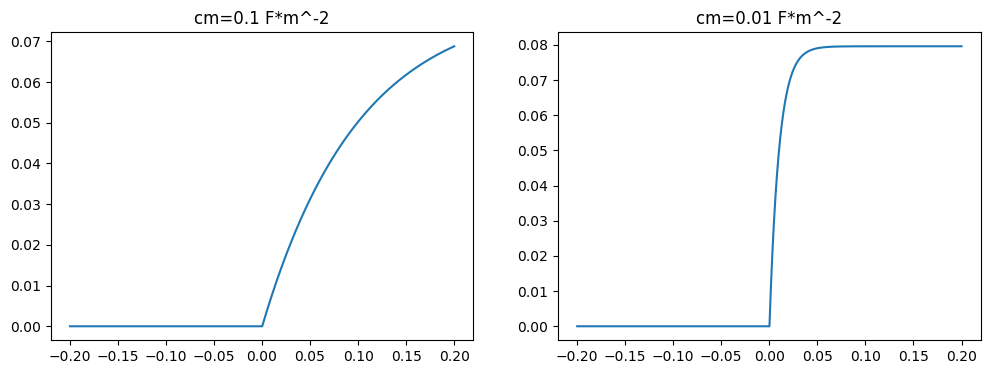

In [25]:
delta_t, t_start, t_stop = 1e-4, -0.2, 0.2
cm=(10**(-1),10**(-2))

subplot_titles = ["cm=0.1 F*m^-2","cm=0.01 F*m^-2"]
num_subplots=len(cm)
fig, axes = plt.subplots(1, num_subplots, figsize=(12, 4))
for i in range(len(cm)):
    Cm = convert_parameters(Em, L, d, rm, cm[i])[4]

    t, v = simulate_step_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm)
    axes[i].plot(t, v)
    axes[i].set_title(subplot_titles[i])
plt.show()




We can see that the higher membrane capacitanse - the more time it takes to reach the saturation level for Vm, since Cm is in the denominator of our function => dV/dt is less. Also Cm is part of tau - a measure of how long the membrane "remembers" its original value

**Step 7:** Simulating the neuron for $r_m = 1\Omega m^2$ and $r_m = 10 \Omega m^2$ and examining the changes

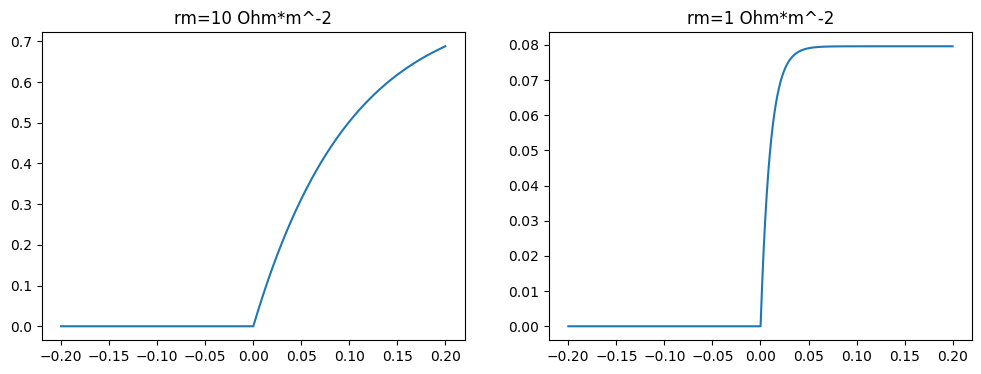

In [27]:
Em, L, d, rm, cm = 0, 100, 2, 1, 10 ** (-2)
delta_t, t_start, t_stop = 1e-4, -0.2, 0.2
rm = (10, 1)

subplot_titles = ["rm=10 Ohm*m^-2", "rm=1 Ohm*m^-2"]
num_subplots = len(rm)
fig, axes = plt.subplots(1, num_subplots, figsize=(12, 4))
for i in range(len(rm)):
    Rm = convert_parameters(Em, L, d, rm[i], cm)[3]

    t, v = simulate_step_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm)
    axes[i].plot(t, v)
    axes[i].set_title(subplot_titles[i])
plt.show()

We can see that when t => infinity, V(t) => Em+Rm*I0; the more Rm - the higher the saturation plato. Also Rm is part of tau - a measure of how long the membrane "remembers" its original value - this explains why by 0.2 ms the membrane potential hasn't reached its plateau


### 3.3

Finally, we can simulate the response to a sinusoidal input current given by
$$
I_e(t) = 100 pA \sin (2 \pi f t),
$$
and run the model for different frequencies.

**Step 8:** implementing the sinusoidal input function.

In [29]:
def sinusoidal_input(time, frequency):
    '''Implements the time-dependent sinusoidal input current I_e.
    
    Args:
        time: Time as float
        frequency: Frequency parameter f
         
    Returns:
        Sinusoidal input current at the given time as float     
    '''
    
    I = 100 * 10 ** (-12) * np.sin(2 * np.pi * time * frequency)
    return (I)  

**Step 9:** implementing  a function to simulate the membrane response to the sinusoidal input by approximating $V(\cdot )$.

In [31]:
def simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency):    
    '''Solves the single-compartment equation using Euler approximation.
    
    Args:
        delta_t: Time step size for Euler
        t_start: Start time of the simulation
        t_stop: End time of the simulation
        Em, L, d, Rm, Cm: As before. Output of convert_parameters() function
        frequency: The frequency f of the sinusoidal input
         
         
    Returns:
        t: Grid points on which the solution is evaluated
        v: The approximated membrane potential evaluated at the grid points     
    '''
    
    
# Backward Euler's method to solve the equation:
def simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency):
    X = []
    X.append([t_start, Em])
    for p in np.linspace(t_start, t_stop, int((t_stop - t_start) / delta_t)):
        t_current, v_current = X[-1]
        I = sinusoidal_input(t_current, frequency)
        v_new = (v_current + delta_t * (I / Cm - (Em - v_current) / (Rm * Cm))) / (1 + delta_t / (Rm * Cm))
        X.append([t_current + delta_t, v_new])
    X = np.array(X)
    t = X[:, 0]
    v = X[:, 1]
    return t, v

# Forward Euler's method to solve the equation:
"""

def simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency):
    X = []
    X.append([t_start, Em])
    for p in np.linspace(t_start, t_stop, int((t_stop - t_start) / delta_t)):
        dvdt = (Em - X[-1][1]) / (Rm * Cm) + sinusoidal_input(X[-1][0], frequency) / Cm
        X.append([X[-1][0] + delta_t, X[-1][1] + dvdt * delta_t])
    X = np.array(X)
    t = (X[:, 0])
    v = X[:, 1]

    return (t, v)
"""  

'\n\ndef simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency):\n    X = []\n    X.append([t_start, Em])\n    for p in np.linspace(t_start, t_stop, int((t_stop - t_start) / delta_t)):\n        dvdt = (Em - X[-1][1]) / (Rm * Cm) + sinusoidal_input(X[-1][0], frequency) / Cm\n        X.append([X[-1][0] + delta_t, X[-1][1] + dvdt * delta_t])\n    X = np.array(X)\n    t = (X[:, 0])\n    v = X[:, 1]\n\n    return (t, v)\n'

**Step 10:** Testing the function for different values of f (freq)

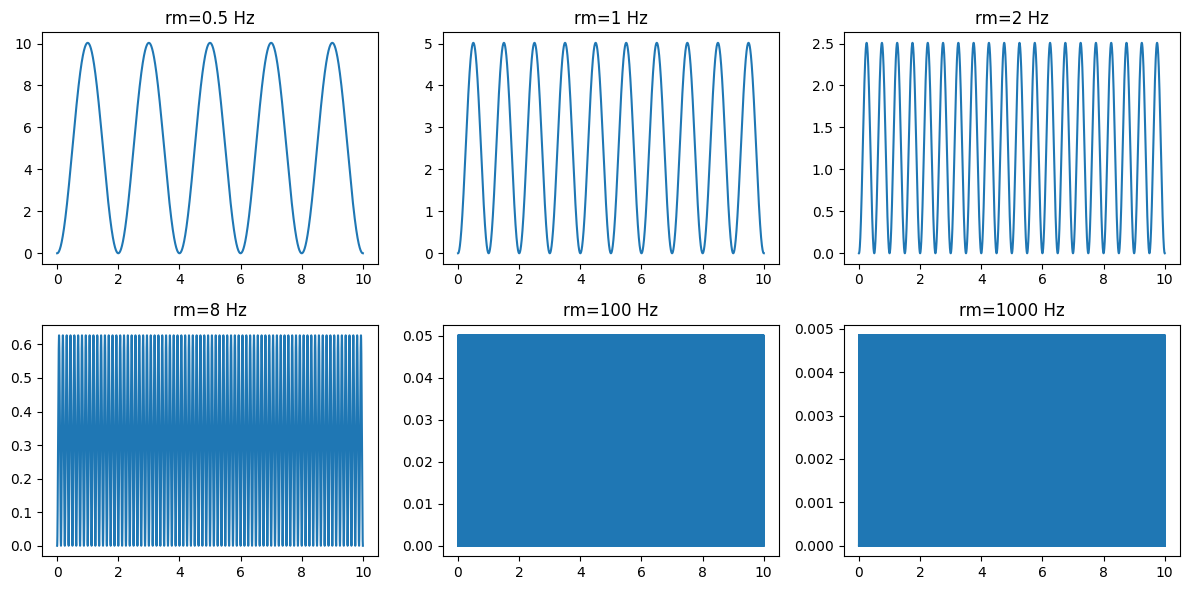

In [36]:
delta_t, t_start, t_stop = 1e-4, 0, 0.2
Em, L, d, rm, cm = 0, 100, 2, 1, 10 ** (-2)
freq = (0.5, 1, 2, 8, 100, 1000)

subplot_titles = ["rm=0.5 Hz", "rm=1 Hz","rm=2 Hz","rm=8 Hz","rm=100 Hz","rm=1000 Hz"]
num_subplots = len(freq)

num_rows = 2
num_cols = num_subplots // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(len(freq)):
    # Calculate the row and column indices for the subplot
    row_idx = i // num_cols
    col_idx = i % num_cols

    t, v = simulate_sinusoidal_function(delta_t, t_start, 10, Em, L, d, Rm, Cm, frequency=freq[i])
    axes[row_idx,col_idx].plot(t, v)
    axes[row_idx,col_idx].set_title(subplot_titles[i])
plt.tight_layout()
plt.show()

**Step 11:** When the system has converges in the simulation, we can plot the log of the amplitude of the solution against the log of the input frequency. 

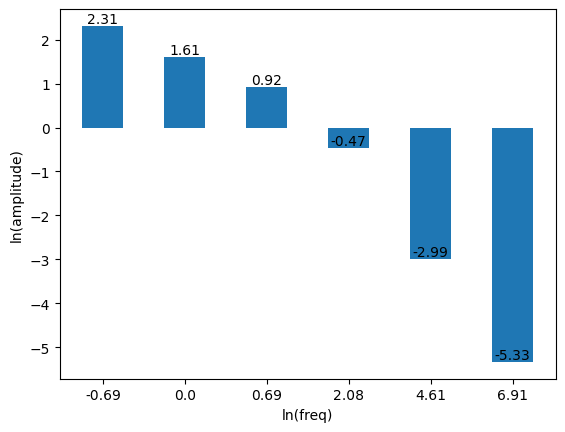

In [41]:
A = []
F = []
for freq in (0.5, 1, 2, 8, 100, 1000):
    t, v = simulate_sinusoidal_function(delta_t, t_start, 10, Em, L, d, Rm, Cm, frequency=freq)

    max_value = np.max(v[61000:81000])
    min_value = np.min(v[61000:81000])
    amplitude = (max_value - min_value)


    A.append(round(math.log(amplitude), 2))
    F.append(round(math.log(freq), 2))

categories = (F)
values = (Y)
bar_width = 0.5
bars = plt.bar(range(len(categories)), values, width=bar_width)
plt.xticks(range(len(categories)), categories)
plt.xlabel('ln(freq)')
plt.ylabel("ln(amplitude)")

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')
plt.show()